In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Familiarizarnos con el dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.Gender = df.Gender.map({'Male': 1, 'Female': 2})

In [5]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [6]:
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

### Aplicamos la técnica de Elbow

In [7]:
centers = range(1, 9)

In [8]:
clusters = [KMeans(n_clusters=center, n_init=10) for center in centers]

In [9]:
scores = [model.fit(df).score(df) for model in clusters]

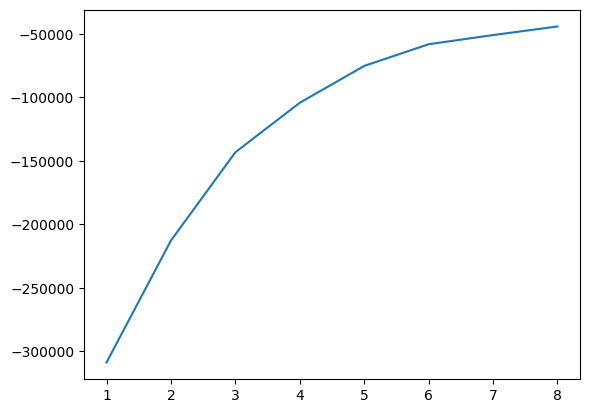

In [10]:
# Graficamos la curva
plt.plot(centers, scores)
plt.show()

In [11]:
k_means_model = KMeans(n_clusters=6, n_init=10)

In [12]:
k_means_model.fit(df)

KMeans(n_clusters=6, n_init=10)

In [13]:
k_means_model.cluster_centers_

array([[44.14285714, 25.14285714, 19.52380952],
       [41.68571429, 88.22857143, 17.28571429],
       [27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [56.15555556, 53.37777778, 49.08888889],
       [25.27272727, 25.72727273, 79.36363636]])

In [14]:
labels = [
    'Clientes Potenciales',
    'Clientes Beneficio',
    'Clientes Estrella',
    'Clientes Conservadores',
    'Clientes Cazaofertas',
    'Clientes Estándar'
]

In [15]:
df['CustomerType'] = k_means_model.labels_

In [18]:
df.to_csv('Mall_Customers_Classified.csv')

In [22]:
def train_and_predict_model(model, x, y, x_for_predict, labels):
    # Primero entrenamos el modelo
    model.fit(x, y)
    # Luego exponemos el score
    print(f'Score: {round(model.score(x, y), 4) * 100}%')
    # Luego predecimos
    print(f'Valor predicho: {labels[model.predict(x_for_predict)[0]]}')


In [37]:
from sklearn.tree import DecisionTreeClassifier
x_for_predict = [[17, 19.5, 27.786]]
x = df.drop('CustomerType', axis='columns')
y = df.CustomerType
tree_classifier = DecisionTreeClassifier()

In [38]:
train_and_predict_model(tree_classifier, x, y, x_for_predict, labels)

Score: 100.0%
Valor predicho: Clientes Potenciales


d:\NUR\2023-II\Algorítmica Avanzada\repository\algoritmica-2023-2\pandas_intro\pandas_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
df.head(15)

,Age,Annual Income (k$),Spending Score (1-100),CustomerType
0,19,15,39,0
1,21,15,81,5
2,20,16,6,0
3,23,16,77,5
4,31,17,40,0
5,22,17,76,5
6,35,18,6,0
7,23,18,94,5
8,64,19,3,0
9,30,19,72,5


In [40]:
k_means_model.labels_

array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 4, 5, 4, 2,
       0, 5, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])